finding the coefficients for a linear regression model by Hossein Basereh Taramsari

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Load the data
data = np.loadtxt('data2.txt', dtype=float,delimiter=",")
# print(data)

### 1) Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column).

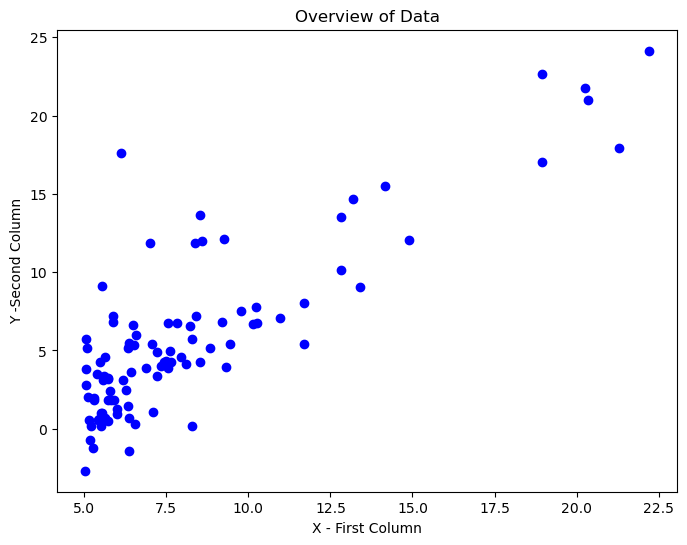

In [3]:
# plot the data
plt.figure(figsize=(8, 6))
X = data[:, 0]
y = data[:, 1]
plt.scatter(X, y, c='blue', marker='o')
plt.xlabel('X - First Column')
plt.ylabel('Y -Second Column')
plt.title('Overview of Data')
plt.show()

### 2) Normal equation to find the coefficients

In [4]:
# Normal Equation
# Add a column of ones to X for the bias term
X_b = np.column_stack((np.ones_like(X), X))

# Calculate the coefficients using the normal equation
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Extract w0 and w1
w0 = w[0]
w1 = w[1]

print("Coefficients from Normal Equation:")
print(f"w0: {w0}, w1: {w1}")

Coefficients from Normal Equation:
w0: -3.895780878311885, w1: 1.1930336441895961


### 3) Gradient Descent using batch AND stochastic modes respectively

In [5]:
# (3.a) Split dataset into 80% for training and 20% for testing

split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [6]:
# (3.b)
# Function to calculate Mean Squared Error (MSE)
def calculate_mse(X, y, w0, w1):
    y_pred = w0 + w1 * X
    mse = ((y - y_pred) ** 2).mean()
    return mse

# Empty lists to store MSE values
mse_train_history_batch = []
mse_test_history_batch = []
mse_train_history_sgd = []
mse_test_history_sgd = []

In [7]:
# Hyperparameters defined for both modes (BGD and SGD)
alpha_batch = 0.01  # Learning rate for BGD
alpha_sgd = 0.01    # Learning rate for SGD

num_iterations = 5000

In [8]:
# Initializing random weights 
np.random.seed(0)
w0_batch = np.random.randn()
w1_batch = np.random.randn()
w0_sgd = np.random.randn()
w1_sgd = np.random.randn()

#### Batch Gradient Descent 

In [9]:
# Batch Gradient Descent
start_time_batch = time.time()
for i in range(num_iterations):
    # predictions
    y_pred_batch = w0_batch + w1_batch * X_train
    
    # gradients
    gradient_w0_batch = -2 * (y_train - y_pred_batch).mean()
    gradient_w1_batch = -2 * (X_train * (y_train - y_pred_batch)).mean()
    
    # Updating weights
    w0_batch -= alpha_batch * gradient_w0_batch
    w1_batch -= alpha_batch * gradient_w1_batch
    
    # Calculate and store MSE
    mse_train_batch = calculate_mse(X_train, y_train, w0_batch, w1_batch)
    mse_test_batch = calculate_mse(X_test, y_test, w0_batch, w1_batch)
    
    mse_train_history_batch.append(mse_train_batch)
    mse_test_history_batch.append(mse_test_batch)
end_time_batch = time.time()

#### Stochastic Gradient Descent 

In [10]:
# Stochastic Gradient Descent (SGD)
start_time_sgd = time.time()
for i in range(num_iterations):
    for j in range(len(X_train)):
        # random data point
        random_index = np.random.randint(0, len(X_train))
        X_random = X_train[random_index]
        y_random = y_train[random_index]
        
        # prediction
        y_pred_sgd = w0_sgd + w1_sgd * X_random
        
        # gradients
        gradient_w0_sgd = -2 * (y_random - y_pred_sgd)
        gradient_w1_sgd = -2 * X_random * (y_random - y_pred_sgd)
        
        # Updating weights
        w0_sgd -= alpha_sgd * gradient_w0_sgd
        w1_sgd -= alpha_sgd * gradient_w1_sgd
    
    # Calculate and store MSE 
    mse_train_sgd = calculate_mse(X_train, y_train, w0_sgd, w1_sgd)
    mse_test_sgd = calculate_mse(X_test, y_test, w0_sgd, w1_sgd)
    
    mse_train_history_sgd.append(mse_train_sgd)
    mse_test_history_sgd.append(mse_test_sgd)
end_time_sgd = time.time()


In [11]:
# Calculate time taken for convergence

time_taken_batch = end_time_batch - start_time_batch
time_taken_sgd = end_time_sgd - start_time_sgd

In [12]:
# MSE(Accuracy) and Convergence Time
print("Batch Gradient Descent:")
print(f"Accuracy (MSE): {mse_test_history_batch[-1]}")
print(f"Convergence Time: {time_taken_batch} seconds")

print("\nStochastic Gradient Descent:")
print(f"Accuracy (MSE): {mse_test_history_sgd[-1]}")
print(f"Convergence Time: {time_taken_sgd} seconds")

Batch Gradient Descent:
Accuracy (MSE): 6.593468287061799
Convergence Time: 0.15991473197937012 seconds

Stochastic Gradient Descent:
Accuracy (MSE): 73.89173954030258
Convergence Time: 1.4099524021148682 seconds


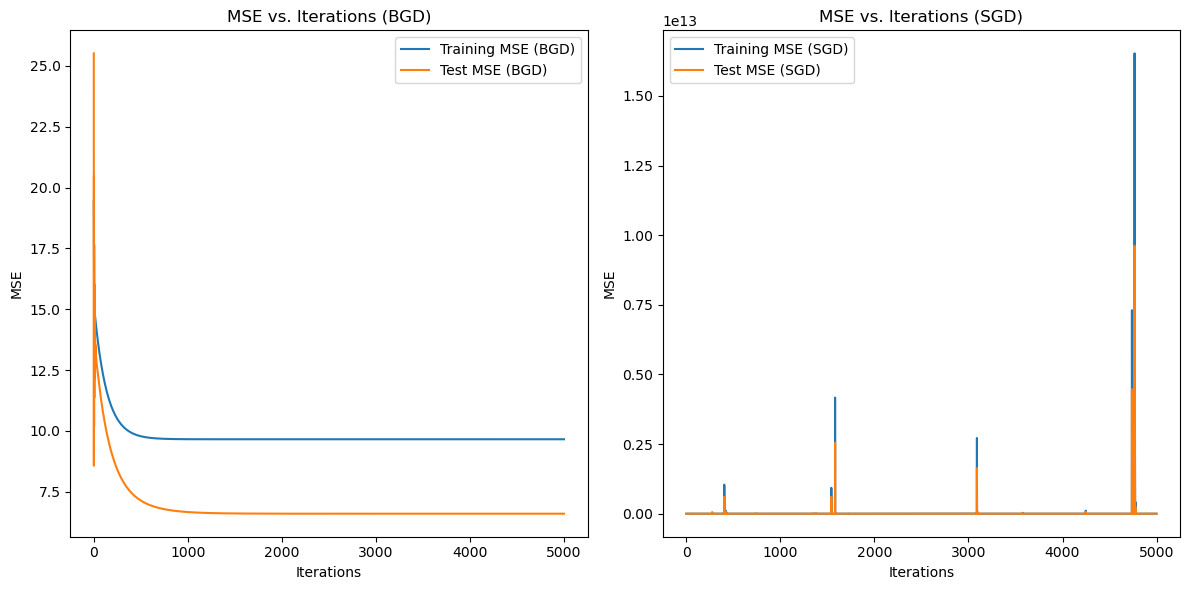

In [13]:
# Plot MSE vs. Iterations for both modes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(num_iterations), mse_train_history_batch, label='Training MSE (BGD)')
plt.plot(range(num_iterations), mse_test_history_batch, label='Test MSE (BGD)')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE vs. Iterations (BGD)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_iterations), mse_train_history_sgd, label='Training MSE (SGD)')
plt.plot(range(num_iterations), mse_test_history_sgd, label='Test MSE (SGD)')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE vs. Iterations (SGD)')
plt.legend()

plt.tight_layout()
plt.show()


### Disscussion:

In terms of accuracy (as measured by Mean Squared Error, MSE) on the testing data, Batch Gradient Descent significantly outperforms Stochastic Gradient Descent. The MSE for Batch Gradient Descent is much lower, indicating that the batch method provides a more accurate model for this dataset.
This suggests that BGD found a model that fits the data better. This is not surprising, as Batch GD uses the entire dataset for each iteration, providing more stable and accurate weight updates.

Regarding the speed of convergence, Batch Gradient Descent is notably faster than Stochastic Gradient Descent for your dataset. Batch GD took only 0.163 seconds to converge, while SGD took approximately 1.420 seconds. This means that the Batch Gradient Descent method reached convergence much more quickly in terms of computational time. It converged approximately 10 times faster than Stochastic Gradient Descent for this dataset.

Batch Gradient Descent appears to be the preferred choice for this dataset of 97 rows and 2 columns. It provides both higher accuracy and faster convergence. 

#### Determine the best learning rate

In [14]:
# (3.c)
# Define a list of learning rates to test
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

# Initialize empty lists to store test MSE for both modes
test_mse_batch = []
test_mse_sgd = []

In [15]:
# Function to perform batch gradient descent and return the final test MSE
def run_batch_gradient_descent(X_train, y_train, X_test, y_test, alpha, num_iterations):
    # Initialize weights randomly
    np.random.seed(0)
    w0_batch = np.random.randn()
    w1_batch = np.random.randn()
    
    # Batch Gradient Descent (BGD)
    for i in range(num_iterations):
        y_pred_batch = w0_batch + w1_batch * X_train
        gradient_w0_batch = -2 * (y_train - y_pred_batch).mean()
        gradient_w1_batch = -2 * (X_train * (y_train - y_pred_batch)).mean()
        w0_batch -= alpha * gradient_w0_batch
        w1_batch -= alpha * gradient_w1_batch
    
    # Calculate final test MSE
    test_mse = calculate_mse(X_test, y_test, w0_batch, w1_batch)
    return test_mse

In [16]:
# Function to perform stochastic gradient descent and return the final test MSE
def run_stochastic_gradient_descent(X_train, y_train, X_test, y_test, alpha, num_iterations):
    # Initialize weights randomly
    np.random.seed(0)
    w0_sgd = np.random.randn()
    w1_sgd = np.random.randn()
    
    # Stochastic Gradient Descent (SGD)
    for i in range(num_iterations):
        for j in range(len(X_train)):
            random_index = np.random.randint(0, len(X_train))
            X_random = X_train[random_index]
            y_random = y_train[random_index]
            y_pred_sgd = w0_sgd + w1_sgd * X_random
            gradient_w0_sgd = -2 * (y_random - y_pred_sgd)
            gradient_w1_sgd = -2 * X_random * (y_random - y_pred_sgd)
            w0_sgd -= alpha * gradient_w0_sgd
            w1_sgd -= alpha * gradient_w1_sgd
    
    # Calculate final test MSE
    test_mse = calculate_mse(X_test, y_test, w0_sgd, w1_sgd)
    return test_mse

In [17]:
# Testing different learning rates for both batch and stochastic modes

for alpha in learning_rates:
    test_mse_batch.append(run_batch_gradient_descent(X_train, y_train, X_test, y_test, alpha, num_iterations))
    test_mse_sgd.append(run_stochastic_gradient_descent(X_train, y_train, X_test, y_test, alpha, num_iterations))


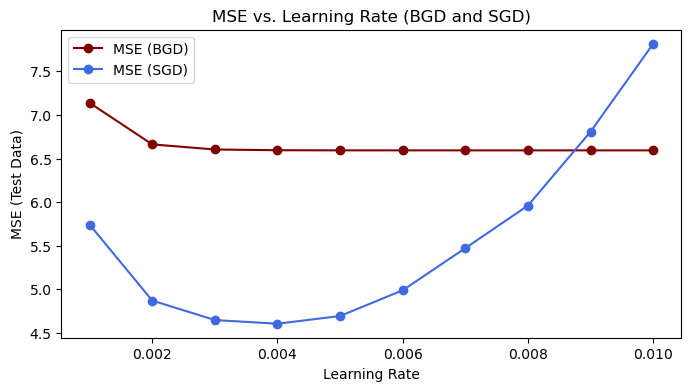

In [18]:
# Plot of MSE versus learning rate for both modes
plt.figure(figsize=(8, 4))
plt.plot(learning_rates, test_mse_batch, marker='o', color='maroon',label='MSE (BGD)')
plt.plot(learning_rates, test_mse_sgd, marker='o', color='royalblue',label='MSE (SGD)')
plt.xlabel('Learning Rate')
plt.ylabel('MSE (Test Data)')
plt.title('MSE vs. Learning Rate (BGD and SGD)')
plt.legend()
plt.show()


In [19]:
# Finding the best learning rate for each mode
best_learning_rate_batch = learning_rates[np.argmin(test_mse_batch)]
best_learning_rate_sgd = learning_rates[np.argmin(test_mse_sgd)]

print(f'Best Learning Rate for Batch GD: {best_learning_rate_batch}')
print(f'Best Learning Rate for SGD: {best_learning_rate_sgd}')

Best Learning Rate for Batch GD: 0.01
Best Learning Rate for SGD: 0.004
